# Aiffel Mini Project - Explorestage 07

# Computer Vision Mini project

## Facial Recognition 


# 7-6. Project: Creating a cat whiskers sticker.(고양이 수염 스티커 만들기)

오늘 배운 내용을 이용해서 여러분 만의 스티커를 만들고 적용해보겠습니다.

주요 라이브러리 버전을 확인해 보고 시작하죠!

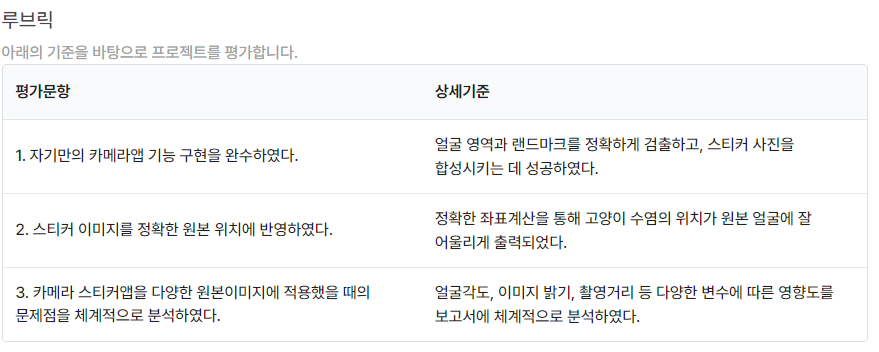

In [3]:
# 필요한 패키지 import 하기
import os # 환경 변수나 디렉터리, 파일 등의 OS 자원을 제어할 수 있게 해주는 모듈
import cv2 # OpenCV라이브러리 → 컴퓨터 비전 관련 프로그래밍을 쉽게 할 수 있도록 도와주는 라이브러리
import matplotlib.pyplot as plt # 다양한 데이터를 많은 방법으로 도식화 할 수 있도록 하는 라이브러리
import numpy as np # 다차원 배열을 쉽게 처리하고 효율적으로 사용할 수 있도록 하는 라이브러리
import dlib # 이미지 처리 및 기계 학습, 얼굴인식 등을 할 수 있는 c++ 로 개발된 고성능의 라이브러리 
print("🌫🛸")

🌫🛸


In [4]:
print(cv2.__version__)
print(dlib.__version__)

4.6.0
19.24.0


### Step 1. Getting or making stickers.(스티커 구하기 or 만들기)
----
스티커를 만들거나 구해야합니다. PPT, 포토샵 등을 이용해서 직접 만드셔도 좋습니다. 보다 간단한 방법은 픽토그램 아이콘을 이용하면 쉽게 만들 수 있습니다.

고양이는 사랑스럽기 때문에 고양이 수염 스티커를 붙여보겠습니다.

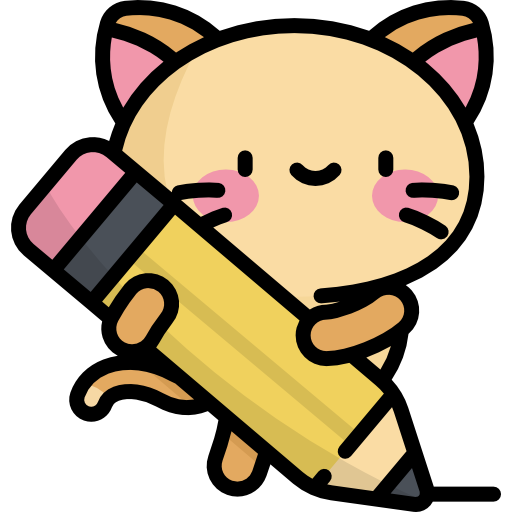

온라인 집사의 삶..

마침 flaticon 사이트에 고양이 수염 이미지가 공개되어 있습니다.

- [고양이 수염 이미지](https://www.flaticon.com/free-icon/cat-whiskers_24674?term=cat%20nose&page=1&position=1#)

(1) 고양이 수염 이미지를 다운로드 받아주세요.

(2) 여러분의 셀카 이미지도 촬영해 주세요.

### Step 2. Detecting faces & detecting landmarks.(얼굴 검출 & 랜드마크 검출 하기)
----
오늘 배운 dlib을 이용해서 얼굴의 bounding box 위치와 landmark의 위치를 찾아주세요.

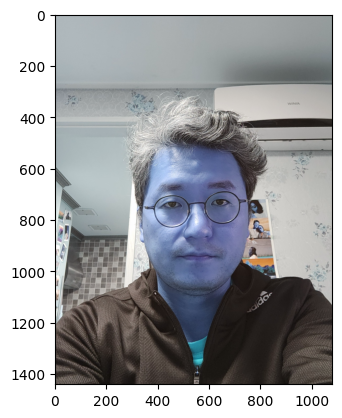

In [5]:
my_image_path = './images/center.jpg' # 본인 이미지가 있는 경로를 가지고 온다.
img_bgr = cv2.imread(my_image_path)    # OpenCV로 이미지를 불러옵니다
img_show = img_bgr.copy()      # 출력용 이미지를 따로 보관합니다
plt.imshow(img_bgr) # 이미지를 출력하기 위해 출력할 이미지를 올려준다. (실제 출력은 하지 않음)
plt.show() # 이미지를 출력해준다. (실제 출력)

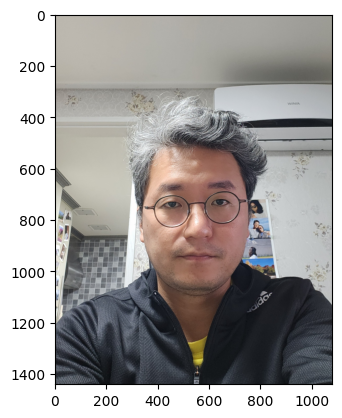

In [4]:
# plt.imshow 이전에 RGB 이미지로 바꾸는 것을 잊지마세요. 
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb) # 이미지 실제 출력하기 위해 이미지를 올려줌 (원하는 사이즈의 픽셀을 원하는 색으로 채워서 만든 그림이라고 합니다.)
plt.show() # 이미지 실제 출력

### Step 3. Checking the placement of the sticker.(스티커 적용 위치 확인하기)
----
고양이 수염이 적용 될 위치를 landmark를 사용해서 계산해 주세요.

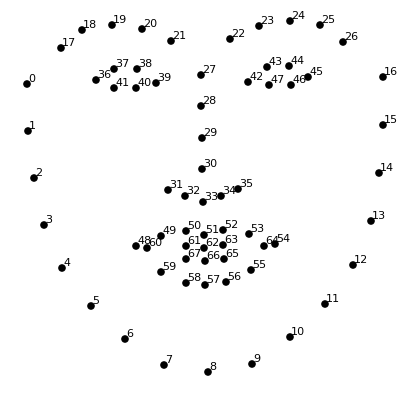

코 끝인 33 번보다 좋은 위치가 있을 거예요.

### 1. Define detector(detector 선언)

In [5]:
detector_hog = dlib.get_frontal_face_detector()

### 2. Detecting faces using the detector_hog.(dectector_hog를 이용해 얼굴 감지)

In [6]:
dlib_rects = detector_hog(img_rgb, 3)

In [7]:
print(dlib_rects)

rectangles[[(357, 634) (771, 1048)]]


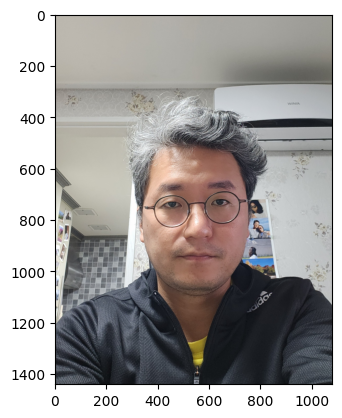

In [8]:
plt.imshow(img_rgb)
plt.show()

In [9]:
img_rgb_copy = img_rgb.copy()

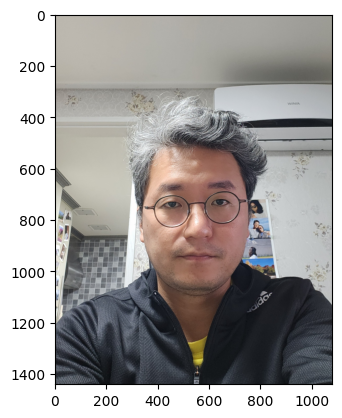

In [10]:
plt.imshow(img_rgb_copy)
plt.show()

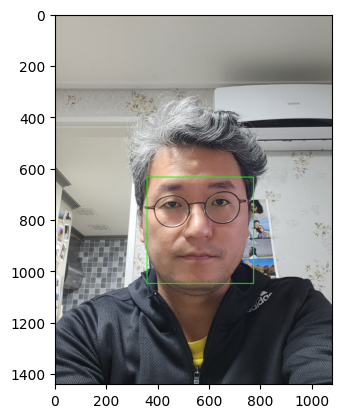

In [11]:
for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()
    
    cv2.rectangle(img_show, (l, t), (r, b), (0, 255, 0), 2, lineType=cv2.LINE_AA)
    
img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

### 3. Conclusion on face recognition.(얼굴인식에 관한 소결론)
- When upsampling is performed once and twice, it slightly encroaches on the eyebrows, so I increased the upsampling to three times.  
    (upsampling이 1번 할때와 2번할때는 눈썹을 살짝 침범해서 upsampling을 3번하도록 했는데)
- The eyebrow part was well detected, but this time it encroached on the left face contour according to the photo's perspective.  
    (눈썹 부분은 잘 인식했으나 이번엔 사진기준 왼쪽 얼굴 윤곽선을 침범했다.)



### Dlib landmark localization

In [12]:
model_path = './models/shape_predictor_68_face_landmarks.dat'

landmark_predictor = dlib.shape_predictor(model_path)

In [13]:
list_landmarks = []

for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)
    
print(len(list_landmarks[0]))

68


- lanmark 시각화

<function matplotlib.pyplot.show(close=None, block=None)>

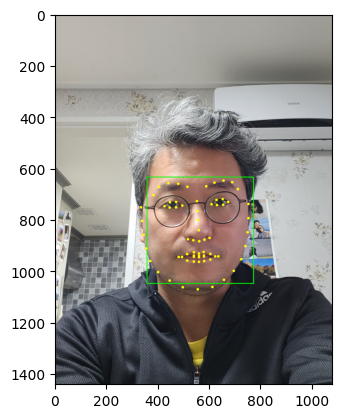

In [14]:
for landmark in list_landmarks:
    for point in landmark:
        cv2.circle(img_show, point, 5, (0, 255, 255), -1)

img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show

### landmark detection에 관한 소결론
1. 얼굴로 인식한 영역 밖이어도 얼굴의 윤곽선을 잘 잡아내고 있다. 

### Step 4. Applying stickers.(스티커 적용하기)
----
(1) 오늘 배운 np.where 를 사용해서 스티커를 적용해 주세요.

(2) 스티커를 조금 더 자연스럽게 보이게 하려면 어떻게 해야 할까요? 스티커 뒤로 원본 이미지가 같이 보이도록 만들어 봅시다. opencv 의 cv2.addWeighted() 를 참고하세요.

### 얼굴 좌표 획득
- 일단 무지성으로 스티커 적용한다. 

In [15]:
for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    print (landmark[30])
    x = landmark[30][0]
    y = landmark[30][1]
    w = h = dlib_rect.width()
    print (f'(x,y) : ({x},{y})')
    print (f'(w,h) : ({w},{h})')

(558, 841)
(x,y) : (558,841)
(w,h) : (415,415)


In [16]:
sticker_image_path = './images/cat-whiskers.png' 
img_sticker = cv2.imread(sticker_image_path)
img_sticker = cv2.resize(img_sticker, (w, h))
print(img_sticker.shape)

(415, 415, 3)


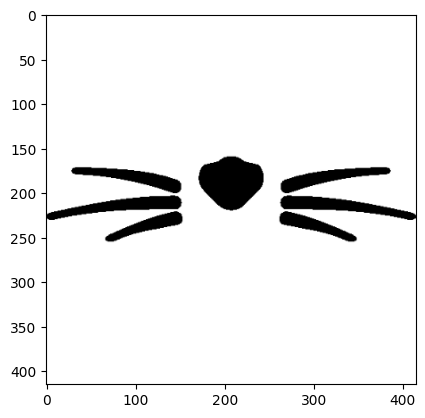

In [17]:
plt.imshow(img_sticker)
plt.show()

In [18]:
refined_x = x - w //2
refined_y = y - h //2

In [19]:
print(refined_x, refined_y)

351 634


In [20]:
sticker_area = img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]

img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = np.where(img_sticker==255, sticker_area,img_sticker).astype(np.uint8)

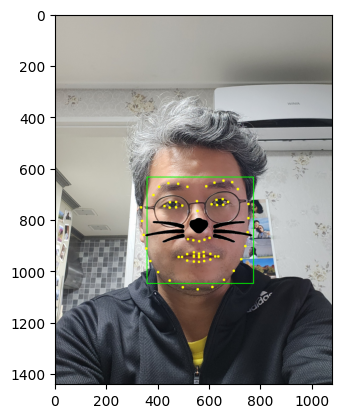

In [21]:
plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

### 스티커 적용 소결론1
- 일단 코끝은 적당한 위치가 아닌거 같다. 

In [22]:
for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    print (landmark[33])
    x = landmark[33][0]
    y = landmark[33][1]
    w = h = dlib_rect.width()
    print (f'(x,y) : ({x},{y})')
    print (f'(w,h) : ({w},{h})')

(560, 884)
(x,y) : (560,884)
(w,h) : (415,415)


In [23]:
refined_x = x - w //2
refined_y = y - h //2

In [24]:
sticker_area = img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]

img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = np.where(img_sticker==255, sticker_area,img_sticker).astype(np.uint8)

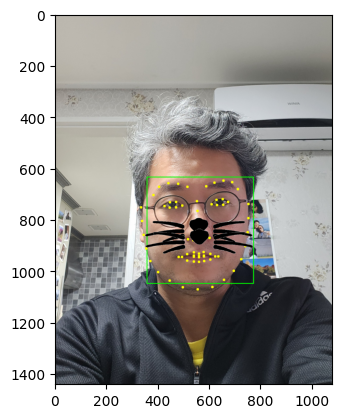

In [25]:
plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

- 조금 괴물 같이 나왔지만 코부다는 코밑에 합성하는 것이 더 자연스러울 것 같다. 
- 이제 제대로 합성해보자

In [26]:
img_result = img_bgr.copy()

In [27]:
sticker_area = img_result[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]

img_result[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = np.where(img_sticker==255, sticker_area,img_sticker).astype(np.uint8)

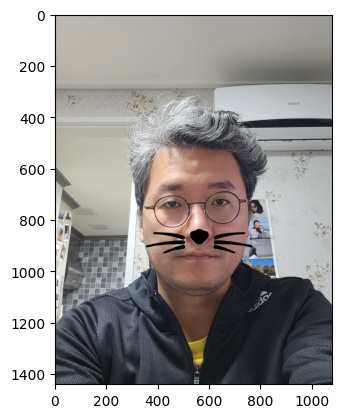

In [28]:
plt.imshow(cv2.cvtColor(img_result, cv2.COLOR_BGR2RGB))
plt.show()

### Step 5. Identifying the problem points.(문제점 찾아보기)
----
(1) 셀프 카메라를 다양한 각도에서 촬영하면서 스티커를 반복해서 적용해 보세요.

(2) 문제점이 무엇인지 최대한 자세하게 기록해 보세요. 여러분이 생각한 문제점을 해결하기 위한 방법은 분명 존재합니다!

> 오늘 만든 스티커앱에서 생각해볼 수 있는 문제점은 다음과 같습니다.
> 
> - 얼굴 각도에 따라 스티커가 어떻게 변해야할까요?
> - 멀리서 촬영하면 왜 안될까요? 옆으로 누워서 촬영하면 왜 안될까요?
> - 실행 속도가 중요할까요?
> - 스티커앱을 만들 때 정확도가 얼마나 중요할까요?

### Detecting photos where parts of the face are outside the frame.(얼굴의 일부가 사진 밖으로 나가버린 사진 검출)

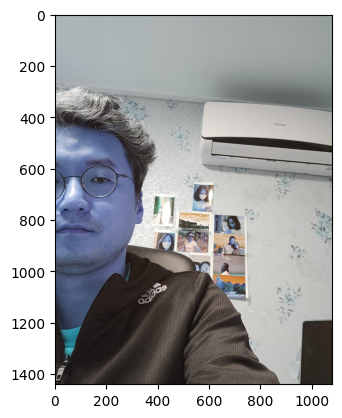

In [29]:
my_image_path = './images/left.jpg'
img_left_bgr = cv2.imread(my_image_path)
img_left_show = img_left_bgr.copy()
plt.imshow(img_left_bgr)
plt.show()

In [30]:
img_left_rgb = cv2.cvtColor(img_left_bgr, cv2.COLOR_BGR2RGB)

In [31]:
dlib_rects = detector_hog(img_left_rgb, 2)
print(dlib_rects)

rectangles[[(-144, 523) (300, 922)], [(416, 873) (453, 910)], [(677, 874) (698, 896)]]


-144 523 300 922
416 873 453 910
677 874 698 896


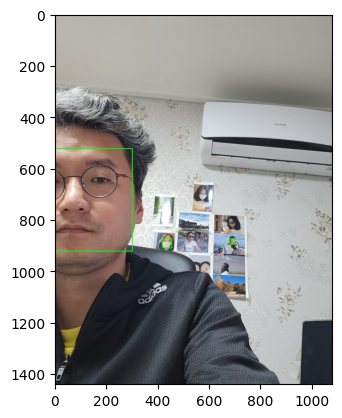

In [32]:
for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()
    print(l, t, r, b)
    
    cv2.rectangle(img_left_show, (l, t), (r, b), (0, 255, 0), 2, lineType=cv2.LINE_AA)
    
img_left_show_rgb =  cv2.cvtColor(img_left_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_left_show_rgb)
plt.show()

In [33]:
print(dlib_rects)

rectangles[[(-144, 523) (300, 922)], [(416, 873) (453, 910)], [(677, 874) (698, 896)]]


In [34]:
# dlib_rects = dlib_rects[0]

In [35]:
print(dlib_rects)

rectangles[[(-144, 523) (300, 922)], [(416, 873) (453, 910)], [(677, 874) (698, 896)]]


In [40]:
list_landmarks = []

for dlib_rect in dlib_rects:
    points = landmark_predictor(img_left_rgb, dlib_rect)
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)
    
print(len(list_landmarks[0]))

68


<function matplotlib.pyplot.show(close=None, block=None)>

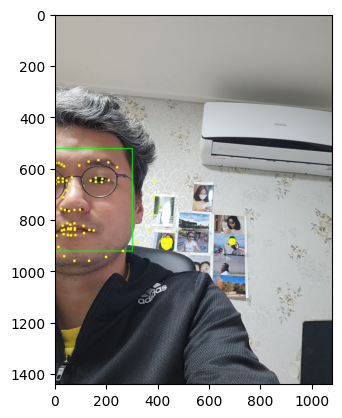

In [41]:
for landmark in list_landmarks:
    for point in landmark:
        cv2.circle(img_left_show, point, 5, (0, 255, 255), -1)

img_left_show_rgb =  cv2.cvtColor(img_left_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_left_show_rgb)
plt.show

### 왼쪽 얼굴 소결론
1. 재미있는 결과가 나왔다. 사진속 내얼굴 뿐만 아니라 어깨뒤로 붙어있는 사진들에게서 얼굴을 검출했다. 
2. 얼굴의 왼쪽부분이 없으니 landmark 검출 결과가 조금 흐트러지기 시작했다. 

In [49]:
dlib_rect = dlib_rects[0]
print(dlib_rect)

[(-144, 523) (300, 922)]


In [50]:
print(dlib_rect.width())

445


In [52]:
x = list_landmarks[0][33][0]
y = list_landmarks[0][33][1]
w = h = dlib_rect.width()
print (f'(x,y) : ({x},{y})')
print (f'(w,h) : ({w},{h})')

(x,y) : (54,766)
(w,h) : (445,445)


In [53]:
refined_x = x - w //2
refined_y = y - h //2

print(refined_x, refined_y)

-168 544


In [54]:
sticker_image_path = './images/cat-whiskers.png' 
img_sticker = cv2.imread(sticker_image_path)
img_sticker = cv2.resize(img_sticker, (w, h))
print(img_sticker.shape)

(445, 445, 3)


x좌표가 음수 이므로 x좌표와 스티커 이미지를 조정 해줘야 한다. 

In [56]:
img_sticker = img_sticker[:, -refined_x:]
refined_x = 0

print(refined_x, refined_y)
print(img_sticker.shape)

0 544
(445, 277, 3)


- 이제 고양이 수염을 합성한다. 

In [57]:
img_left_result = img_left_bgr.copy()

In [58]:
sticker_area = img_left_result[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]

img_left_result[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = np.where(img_sticker==255, sticker_area,img_sticker).astype(np.uint8)

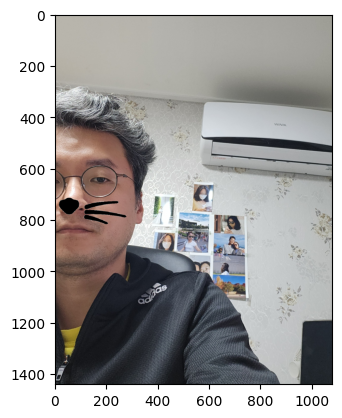

In [59]:
plt.imshow(cv2.cvtColor(img_left_result, cv2.COLOR_BGR2RGB))
plt.show()

### 왼쪽 얼굴 소결론2
1. 애초 landmark detection이 틀어져서 합성도 조금 틀어져 버렸다.
2. 픽셀단위로 수정해서 제대로 합성 할수 있지마나 포인트는 합성 보다는 검출이기 때문에 이정도로 결론을 짓는다. 
3. 모델이 도출한 얼굴중에 원하는 얼굴에 합성하는 것이 포인트이다. 

### Detecting faces in low-light conditions.(저조도 상황 얼굴 검출)

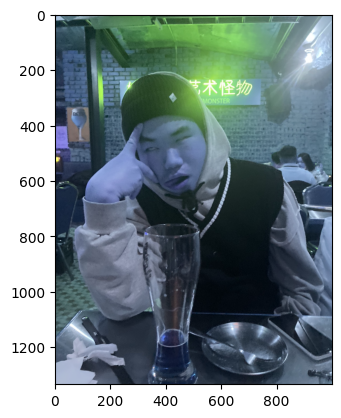

In [68]:
my_image_path = './images/sung.jpg'
img_sung_bgr = cv2.imread(my_image_path)
img_sung_show = img_sung_bgr.copy()
plt.imshow(img_sung_bgr)
plt.show()

In [69]:
img_sung_rgb = cv2.cvtColor(img_sung_bgr, cv2.COLOR_BGR2RGB)

In [70]:
dlib_rects = detector_hog(img_sung_rgb, 2)
print(dlib_rects)

rectangles[[(301, 405) (532, 636)]]


301 405 532 636


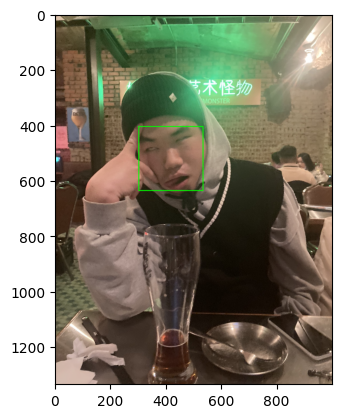

In [71]:
for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()
    print(l, t, r, b)
    
    cv2.rectangle(img_sung_show, (l, t), (r, b), (0, 255, 0), 2, lineType=cv2.LINE_AA)
    
img_sung_show_rgb =  cv2.cvtColor(img_sung_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_sung_show_rgb)
plt.show()

In [72]:
list_landmarks = []

for dlib_rect in dlib_rects:
    points = landmark_predictor(img_sung_rgb, dlib_rect)
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)
    
print(len(list_landmarks[0]))

68


<function matplotlib.pyplot.show(close=None, block=None)>

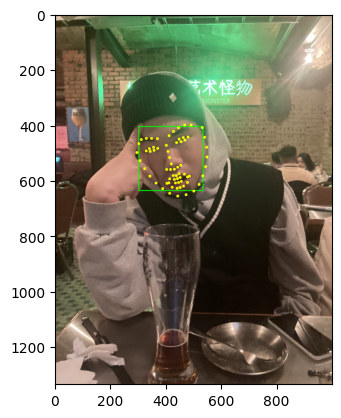

In [73]:
for landmark in list_landmarks:
    for point in landmark:
        cv2.circle(img_sung_show, point, 5, (0, 255, 255), -1)

img_sung_show_rgb =  cv2.cvtColor(img_sung_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_sung_show_rgb)
plt.show

In [74]:
for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    print (landmark[33])
    x = landmark[33][0]
    y = landmark[33][1]
    w = h = dlib_rect.width()
    print (f'(x,y) : ({x},{y})')
    print (f'(w,h) : ({w},{h})')

(429, 559)
(x,y) : (429,559)
(w,h) : (232,232)


In [75]:
sticker_image_path = './images/cat-whiskers.png' 
img_sticker = cv2.imread(sticker_image_path)
img_sticker = cv2.resize(img_sticker, (w, h))
print(img_sticker.shape)

(232, 232, 3)


In [76]:
refined_x = x - w //2
refined_y = y - h //2

print(refined_x, refined_y)

313 443


In [78]:
img_sung_result = img_sung_bgr.copy()

In [79]:
sticker_area = img_sung_result[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]

img_sung_result[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = np.where(img_sticker==255, sticker_area,img_sticker).astype(np.uint8)

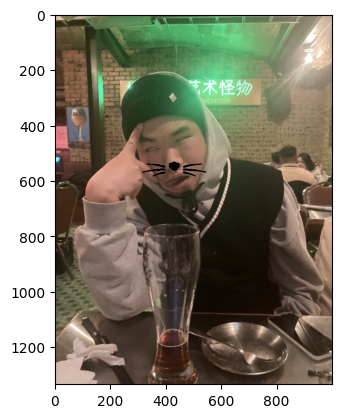

In [80]:
plt.imshow(cv2.cvtColor(img_sung_result, cv2.COLOR_BGR2RGB))
plt.show()

### 저조도 사진 얼굴 검출 소결론
1. 나름 큰 어려움 없이 잘 되었다.
2. 로테이션을 하지 못한게 아쉽다. 

### Detecting faces in backlit conditions.(역광상황 얼굴 검출)

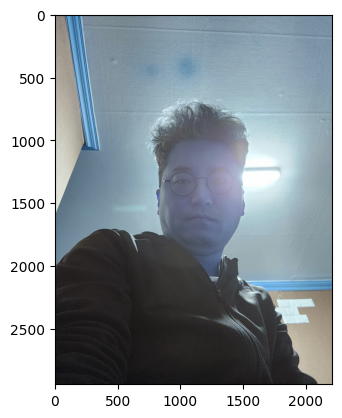

In [81]:
my_image_path = './images/light.jpg'
img_light_bgr = cv2.imread(my_image_path)
img_light_show = img_light_bgr.copy()
plt.imshow(img_light_bgr)
plt.show()

In [82]:
img_light_rgb = cv2.cvtColor(img_light_bgr, cv2.COLOR_BGR2RGB)

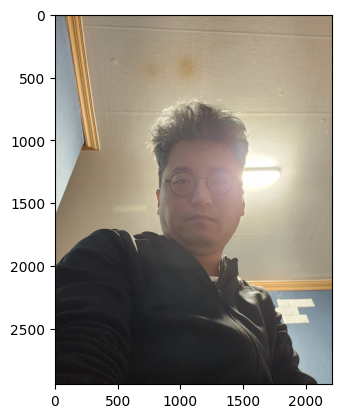

In [84]:
plt.imshow(img_light_rgb)
plt.show()

In [83]:
dlib_rects = detector_hog(img_light_rgb, 2)
print(dlib_rects)

rectangles[]


### 역광상황 얼굴검출 소결론1
1. 얼굴을 검출해내지 못했다.
2. 업샘플링을 좀더 많이 해서 시도해본다. 

In [85]:
dlib_rects = detector_hog(img_light_rgb, 3)
print(dlib_rects)

rectangles[]


### 역광상황 얼굴검출 소결론2
1. 여전히 얼굴을 검출해내지 못했다.

# Reflection(회고)


### Points of confirmation.(확인한점)
- OpenCV uses the BGR color space, while other modules use the RGB color space. Therefore, if you convert images to RGB and use them, there can be color distortion due to the difference in color spaces. To avoid this, it is necessary to have separate representations for BGR and RGB color spaces and load the required images accordingly to ensure color accuracy.  
    (opencv는 bgr 색영역을 쓰고, 다른 모듈들은 rgb 색영역을 쓰기 때문에 rgb로 변환해 놓고, 사용하게 되면 서로의 색공간이 달라서 색이 왜곡되는 경우가 발생한다. 그래서 bgr과 rgb 색영역에 대해 각각 하나씩 만들어 놓고 그때 그때 필요한 이미지를 불러와서 진행해야 색이 왜곡되지 않는다.)
    - In this case, img_rgb refers to the image in the RGB color space, which is the target image for object detection. On the other hand, img_show refers to the image in the BGR color space, which is used to visualize various processing results.  
        (여기서는 img_rgb가 rgb영역이고 object detection을 하는 대상 이미지이고, img_show가 bgr영역이면서 여러 처리결과를 시각화 하는 대상이다.)
- dlib's face detection and landmark detection are powerful enough to recognize and detect faces even in small images within a larger image. However, they were not able to detect faces in backlit conditions.  
    (dlib의 얼굴인식과 landmark 인식은 이미지속에 있는 작은 사진의 얼굴도 인식하고 검출 할 수 있을 정도로 강력하지만, 역광상황에서는 얼굴을 인식하지 못했다.)
- In low-light conditions, as long as there was sufficient contrast in the facial features within the photo, it was possible to successfully recognize faces.  
    (저조도 상황에서는 사진속 얼굴의 음영차가 확실하기만 하다면 충분히 얼굴을 인식해 냄을 알 수 있었다.)

### Points I paid attention to(신경쓴 점)
- I synthesized cat whiskers using various photos.(다양한 사진으로 고양이 수염을 합성했다.)
- I made efforts to ensure that cat whiskers are properly synthesized even in situations where they may be cut off in the photo.  
    (사진속 고양이 수염이 짤리는 상황에서도 정상적으로 합성 되도록 노력했다.)

### Weak points(아쉬운점)
- I lacked sufficient knowledge in studying the aspect of tilting cat whiskers to properly synthesize them when the face is tilted.  
    (얼굴이 기울었을 때 고양이 수염도 기울여서 합성해야 하는데 그 부분에 대한 공부가 미진했다.)
- I intended to try using dlib's CNN face detection model when hog fails to detect faces in backlight situations, but I couldn't do it due to a lack of time.  
    (역광상황에서 hog가 얼굴을 인식해내지 못할때 dlib의 cnn 얼굴 인식 모델을 이용해 시도해보려 했으나 시간 부족으로 하지 못했다.)

### Points for improvement(개선하고 싶은 점)
- I would like to test whether landmark location can recognize facial features by directly providing the coordinates of the face region when hog fails to detect faces.  
    (hog로 얼굴인식 하지 못했을때 직접 얼굴 영역을 좌표로 줘서 landmark location이 이목구비를 인식하는지 테스트 해보고 싶다.)